In [1]:
import keras

from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
num_of_classes = 10

(x_train, y_train) , (x_test,y_test) = mnist.load_data()

y_train = keras.utils.to_categorical(y_train, num_of_classes)
y_test = keras.utils.to_categorical(y_test, num_of_classes)



11493376/11490434 [==============================] - 2s 0us/step


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


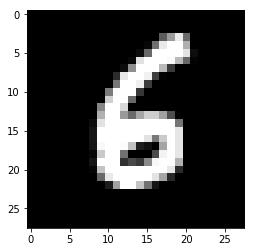

In [3]:
import matplotlib.pyplot as plt
import random

i = random.randint(0,40000)

plt.imshow(x_train[i], cmap = "gray")
print(y_train[i])

In [4]:
x_train = x_train.reshape(60000, 28,28,1).astype("float32")
x_test = x_test.reshape(10000,28,28,1).astype("float32")

x_train /= 255
x_test /= 255

print(x_train.shape[0])
print(x_test.shape[0])





60000
10000


In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size = [3,3], input_shape = [28,28,1], activation = "relu"))
model.add(Conv2D(64, kernel_size = [3,3], activation = "relu"))
model.add(MaxPooling2D(pool_size =3))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation = "relu"))
model.add(keras.layers.Activation("softmax"))



W0706 11:44:41.833690 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 11:44:41.885864 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 11:44:41.895900 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0706 11:44:41.951021 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0706 11:44:41.954980 140437456574336 deprecation_wrapp

In [6]:
model.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
              metrics = ["accuracy"])

W0706 11:44:43.120586 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0706 11:44:43.132202 140437456574336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback


tbc = TensorBoardColab()


Wait for 8 seconds...
TensorBoard link:
https://d076dbbd.ngrok.io


In [12]:
my_batch_size = 128
model.fit(x_train, y_train,
         batch_size = my_batch_size,
         epochs = 100,
         verbose = 1,
         validation_data = (x_test,y_test),
         callbacks = [TensorBoardColabCallback(tbc)])

score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss {0}".format(score[0]))
print("Test accuracy {0}".format(score[1]))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.0457 - acc: 0.9869 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 2/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 3/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.0372 - acc: 0.9889 - val_loss: 0.0279 - val_acc: 0.9908
Epoch 4/100
60000/60000 [==============================] - 8s 131us/step - loss: 0.0340 - acc: 0.9903 - val_loss: 0.0250 - val_acc: 0.9920
Epoch 5/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.0331 - acc: 0.9902 - val_loss: 0.0246 - val_acc: 0.9920
Epoch 6/100
60000/60000 [==============================] - 8s 129us/step - loss: 0.0315 - acc: 0.9906 - val_loss: 0.0264 - val_acc: 0.9922
Epoch 7/100
60000/60000 [==============================] - 8s 130us/step - loss: 0.0294 - acc: 0.9911 - val_loss: 0.